# LFV Higgs decays in the 2HDM with  SeeSaw type I

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from FF_symbolic import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from FF_symbolic import DiagramasWninj,DiagramasniWW,DiagramasniWH,DiagramasniHW
from FF_symbolic import DiagramasHninj,DiagramasniHH
from FF_symbolic import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from FF_symbolic import j as jj
from FF_symbolic import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

In [5]:
from multiprocessing import Pool, cpu_count
from time import time

In [6]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    pool.close()
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [7]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [8]:
m1 = 1e-12  #GeV 

#current values to Square mass differences
d21 = Nudata.squareDm21.central*1e-18# factor to convert eV^2 to GeV^2
d31 = Nudata.squareDm31.central*1e-18

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = np.sqrt(m1**2 + d21)
m3 = np.sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

### Form factor with one fermion in the loop.

In [9]:
# for D in TrianglesOneFermion:
#     display(D.AL().atoms(Symbol))

#### AL one fermion 

In [10]:
from OneLoopLFVHD.data import ml_np

In [11]:
ma,mb = symbols('m_a,m_b',positive=True)
# valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
# valores_H ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
valoresSM ={mW:80.379,g:(2*80.379)/246.0}

# cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}
cambios_lab = lambda mla,mlb:{lfvhd.mi:mla,lfvhd.mj:mlb}



Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

# from Unu_seesaw_2HDM import diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

from Unu_seesaw import diagonalizationMnu_np

diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu_np(
    m1,m2,m3,m6/3.0,m6/2.0,m6)

(array([0.85901288+0.j, 3.14098712+0.j, 1.89442596+0.j, 4.10557404+0.j,
       4.46191546+0.j, 0.53808454+0.j]), array([[ 0.88614151+0.j        ,  0.        +0.46341474j,
         0.        +0.j        ,  0.        +0.j        ,
        -0.        +0.j        ,  0.        +0.j        ],
       [-0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.32805016j,  0.9446603 +0.j        ],
       [-0.        +0.j        ,  0.        +0.j        ,
         0.82720151+0.j        ,  0.        +0.56190538j,
        -0.        +0.j        ,  0.        +0.j        ],
       [-0.        -0.46341474j,  0.88614151+0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
        -0.        +0.j        ,  0.        +0.j        ],
       [-0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.9446603 +0.j        , -0.        -0.32805016j],
       [-0. 

In [12]:
diagonalizationMnu1(m1,100)

(array([0.85901288+0.j, 3.14098712+0.j, 1.89442596+0.j, 4.10557404+0.j,
        4.46191546+0.j, 0.53808454+0.j]),
 array([[ 0.88614151+0.j        ,  0.        +0.46341474j,
          0.        +0.j        ,  0.        +0.j        ,
         -0.        +0.j        ,  0.        +0.j        ],
        [-0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.32805016j,  0.9446603 +0.j        ],
        [-0.        +0.j        ,  0.        +0.j        ,
          0.82720151+0.j        ,  0.        +0.56190538j,
         -0.        +0.j        ,  0.        +0.j        ],
        [-0.        -0.46341474j,  0.88614151+0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
         -0.        +0.j        ,  0.        +0.j        ],
        [-0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.9446603 +0.j        , -0.        -0.32805016

In [13]:
C0_sp, C1_sp, C2_sp, B120_sp, B10_sp,B11_sp,B20_sp,B21_sp = symbols('C0, C1, C2, B120, B10,B11,B20,B21')
cambios_pave_sympy = lambda M0,M1,M2: {lfvhd.C0(M0,M1,M2):C0_sp,lfvhd.C1(M0,M1,M2):C1_sp,
                                      lfvhd.C2(M0,M1,M2):C2_sp,lfvhd.B12_0(M1,M2):B120_sp,
                                      lfvhd.B1_0(M0,M1):B10_sp,lfvhd.B1_1(M0,M1):B11_sp,
                                      lfvhd.B2_0(M0,M2):B20_sp,lfvhd.B2_1(M0,M2):B21_sp}
cambiosniWW = cambios_pave_sympy(mn[i],mW,mW)
cambiosniWH = cambios_pave_sympy(mn[i],mW,mHpm)
cambiosniHW = cambios_pave_sympy(mn[i],mHpm,mW)
cambiosniHH = cambios_pave_sympy(mn[i],mHpm,mHpm)

cambiosWninj = cambios_pave_sympy(mW,mn[i],mn[jj])
cambiosHninj = cambios_pave_sympy(mHpm,mn[i],mn[jj])

#cambiosniWW

In [14]:
import OneLoopLFVHD.LFVHDFeynG_numpy as lfvhd_np# B1_0, B2_0, B1_1, B2_1, B12_0, C0, C1, C2

### Diagrams with One Fermion

#### Diagrams with $n_i WW$ numeric

In [15]:
####################
mW_val = valoresSM[mW]
C0_mp_niWW = lambda ms,mni_: lfvhd_np.C0(ms,mni_,mW_val,mW_val)
C1_mp_niWW = lambda ms,mni_,mla: lfvhd_np.C1(ms,mla,mni_,mW_val,mW_val)
C2_mp_niWW = lambda ms,mni_,mlb: lfvhd_np.C2(ms,mlb,mni_,mW_val,mW_val)
B120_mp_niWW = lambda ms: lfvhd_np.B12_0(ms,mW_val,mW_val)
B10_mp_niWW = lambda mni_,mla: lfvhd_np.B1_0(mla,mni_,mW_val)#ma,mi,M0,M1
B11_mp_niWW = lambda mni_,mla: lfvhd_np.B1_1(mla,mni_,mW_val)
B20_mp_niWW = lambda mni_,mlb: lfvhd_np.B2_0(mlb,mni_,mW_val)
B21_mp_niWW = lambda mni_,mlb: lfvhd_np.B2_1(mlb,mni_,mW_val)


FF_list_niWW = []
for dia_niWW in DiagramasniWW:
    A_sp_niWWL = lambda mla,mlb: dia_niWW.AL().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niWWR = lambda mla,mlb: dia_niWW.AR().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)


    #display(A_sp_niWWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niWWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWL(mla,mlb),'numpy')

    A_lamb_niWWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWR(mla,mlb),'numpy')
    #print(A_lamb_niWWL(ml[2],ml[3])(1,2,3,4,5,6,7,8,9,10,11,12,13,14))


    def FFniWWL(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
        return  np.vectorize(
            A_lamb_niWWL(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),
                B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))
                )

    def FFniWWR(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
        return np.vectorize(
            A_lamb_niWWR(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),
                B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))
                )

    FF_list_niWW.append({'L':FFniWWL,'R':FFniWWR})
    

In [16]:
%%time
(
    FF_list_niWW[0]['L'](125.10,2,3,4,5,6,7,8),
    FF_list_niWW[0]['R'](125.10,2,3,4,5,6,7,8)
)

CPU times: user 1.19 s, sys: 0 ns, total: 1.19 s
Wall time: 1.2 s


(<numpy.vectorize at 0x7fe2b47e22d0>, <numpy.vectorize at 0x7fe2b3d76c50>)

In [17]:
# def y11(mi,M0,M1):
#     a = mi**2
#     b = - (mi**2 + M0**2-M1**2)
#     c = M0**2
#     return np.roots([a,b,c])[0]
# #lfvhd_np.B1_0(mla,mni_,mW_val)
# y11 = np.vectorize(y11)
# y11(ml_np[2],m,mW_val)

In [18]:
# m = np.linspace(1,10,20)
# print(C0_mp_niWW(125.1,m))
# #print(C1_mp_niWW(125.1,m,ml_np[1]))
# #print(C2_mp_niWW(125.1,m,ml_np[2]))
# print(B10_mp_niWW(m,ml_np[2]))

[-0.00020306+0.j -0.00020287+0.j -0.00020263+0.j -0.00020234+0.j
 -0.00020201+0.j -0.00020165+0.j -0.00020126+0.j -0.00020084+0.j
 -0.00020039+0.j -0.00019992+0.j -0.00019943+0.j -0.00019891+0.j
 -0.00019837+0.j -0.00019782+0.j -0.00019725+0.j -0.00019666+0.j
 -0.00019606+0.j -0.00019545+0.j -0.00019482+0.j -0.00019418+0.j]
[-16.5483691 +0.j -15.77416923+0.j -15.21842296+0.j -14.7849672 +0.j
 -14.42985568+0.j -14.12928459+0.j -13.86889694+0.j -13.63936131+0.j
 -13.43426848+0.j -13.24902502+0.j -13.08022569+0.j -12.92527555+0.j
 -12.78215137+0.j -12.64924487+0.j -12.52525631+0.j -12.40912014+0.j
 -12.29995179+0.j -12.19700879+0.j -12.09966178+0.j -12.00737261+0.j]


#### Diagrams with $n_i HH$ numeric

In [19]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHH = lambda ms,mni_,mHpm: lfvhd_np.C0(ms,mni_,mHpm,mHpm)
C1_mp_niHH = lambda ms,mni_,mla,mHpm: lfvhd_np.C1(ms,mla,mni_,mHpm,mHpm)
C2_mp_niHH = lambda ms,mni_,mlb,mHpm: lfvhd_np.C2(ms,mlb,mni_,mHpm,mHpm)
B10_mp_niHH = lambda mni_,mla,mHpm: lfvhd_np.B1_0(mla,mni_,mHpm)
B11_mp_niHH = lambda mni_,mla,mHpm: lfvhd_np.B1_1(mla,mni_,mHpm)
B20_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_np.B2_0(mlb,mni_,mHpm)
B21_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_np.B2_1(mlb,mni_,mHpm)

###################3
FF_list_niHH = []
for dia_niHH in DiagramasniHH:
    A_sp_niHHL = lambda mla,mlb: dia_niHH.AL().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niHHR = lambda mla,mlb: dia_niHH.AR().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    
    #display(A_sp_niHHL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,β,λ5,ξlϕ,ξlA,ξnA,Δφ,Kφ,Qφ,ρφ,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHL(mla,mlb),'numpy')
    
    A_lamb_niHHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,β,λ5,ξlϕ,ξlA,ξnA,Δφ,Kφ,Qφ,ρφ,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHR(mla,mlb),'numpy')
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniHHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,
           mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi):
        return A_lamb_niHHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                      mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    def FFniHHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,
           mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi):
        return A_lamb_niHHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                      mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    FF_list_niHH.append({'L':FFniHHL,'R':FFniHHR})

In [20]:
(
    FF_list_niHH[0]['L'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16),
    FF_list_niHH[0]['R'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16)
)

((8.148602463221688637e-16-0j), (3.4224143673571278732e-16-0j))

#### Diagrams with $n_i WH$ numeric

In [21]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niWH = lambda ms,mni_,mHpm: lfvhd_np.C0(ms,mni_,mW_val,mHpm)
C1_mp_niWH = lambda ms,mni_,mla,mHpm: lfvhd_np.C1(ms,mla,mni_,mW_val,mHpm)
C2_mp_niWH = lambda ms,mni_,mlb,mHpm: lfvhd_np.C2(ms,mlb,mni_,mW_val,mHpm)

###################3

FF_list_niWH = []
for dia_niWH in DiagramasniWH:
    A_sp_niWHL = lambda mla,mlb: dia_niWH.AL().subs(
    lfvhd.B12_0(mW,mHpm),0).subs(cambiosniWH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niWHR = lambda mla,mlb: dia_niWH.AR().subs(
    lfvhd.B12_0(mW,mHpm),0).subs(cambiosniWH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    
    #display(A_sp_niWHR(ml[1],ml[2]))
    A_lamb_niWHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHL(mla,mlb),'numpy')
    
    A_lamb_niWHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHR(mla,mlb),'numpy')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniWHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niWHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    def FFniWHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niWHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    FF_list_niWH.append({'L':FFniWHL,'R':FFniWHR})

In [22]:
(
    FF_list_niWH[0]['L'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niWH[0]['R'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((-9.296425521197594116e-12-3.0972455173014964932e-11j),
 (-2.6072694000050667895e-12+4.74500650591350361e-11j))

#### Diagrams with $n_i HW$ numeric

In [23]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHW = lambda ms,mni_,mHpm: lfvhd_np.C0(ms,mni_,mHpm,mW_val)
C1_mp_niHW = lambda ms,mni_,mla,mHpm: lfvhd_np.C1(ms,mla,mni_,mHpm,mW_val)
C2_mp_niHW = lambda ms,mni_,mlb,mHpm: lfvhd_np.C2(ms,mlb,mni_,mHpm,mW_val)

###################3

FF_list_niHW = []
for dia_niHW in DiagramasniHW:
    A_sp_niHWL = lambda mla,mlb: dia_niHW.AL().subs(
    lfvhd.B12_0(mHpm,mW),0).subs(cambiosniHW).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niHWR = lambda mla,mlb: dia_niHW.AR().subs(
    lfvhd.B12_0(mHpm,mW),0).subs(cambiosniHW).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    #display(A_sp_niHWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWL(mla,mlb),'numpy')
    
    A_lamb_niHWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWR(mla,mlb),'numpy')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))

    def FFniHWL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niHWL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    def FFniHWR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niHWR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    FF_list_niHW.append({'L':FFniHWL,'R':FFniHWR})

In [24]:
(
    FF_list_niHW[0]['L'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niHW[0]['R'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((3.7851938708254689102e-12+2.7856042353101740315e-11j),
 (-1.0529604583167945295e-11-4.0901945715211660438e-11j))

In [25]:
# for FF_dict in FF_list_niWH:
#     #display(FF_dict['L'])    
#     print(FF_dict['L'](mpf('125.10'),2,3,4,5,6,7,8,9,10))

### Diagrams with two fermions

In [26]:
## Internal funtions TwoFermion

mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}

#### Diagrams with $W n_i n_j$ numeric

In [27]:
C0_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_np.C0(ms,mW_val,mni_,mnj_)
C1_mp_Wninj = lambda ms,mni_,mnj_,mla: lfvhd_np.C1(ms,mla,mW_val,mni_,mnj_)
C2_mp_Wninj = lambda ms,mni_,mnj_,mlb: lfvhd_np.C2(ms,mlb,mW_val,mni_,mnj_)
B120_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_np.B12_0(ms,mni_,mnj_)

FF_list_Wninj = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
for dia_Wninj in DiagramasWninj:
    A_sp_WninjL = lambda mla,mlb: dia_Wninj.AL().subs(cambiosWninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    A_sp_WninjR = lambda mla,mlb: dia_Wninj.AR().subs(cambiosWninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    
    
    #display(A_sp_WninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_WninjL = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,ξnϕ,
                   C0_sp,C1_sp,B120_sp], A_sp_WninjL(mla,mlb),'numpy')
    
    A_lamb_WninjR = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,ξnϕ,
                   C0_sp,C2_sp,B120_sp], A_sp_WninjR(mla,mlb),'numpy')
    
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFWninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi):
        return A_lamb_WninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi,
            C0_mp_Wninj(ms_val,mni_,mnj_),C1_mp_Wninj(ms_val,mni_,mnj_,mla),
            B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    def FFWninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi):
        return A_lamb_WninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi,
            C0_mp_Wninj(ms_val,mni_,mnj_),
            C2_mp_Wninj(ms_val,mni_,mnj_,mlb),B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    
    FF_list_Wninj.append({'L':FFWninjL,'R':FFWninjR})#
    

In [28]:
%%time
(
    FF_list_Wninj[0]['L'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_Wninj[0]['R'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

CPU times: user 1.7 s, sys: 0 ns, total: 1.7 s
Wall time: 1.73 s


((3.706093348250451763e-11-2.7896947980710773253e-11j),
 (5.2508616276331088044e-11-3.9382506274601554223e-11j))

#### Diagrams with $H n_i n_j$ numeric

In [29]:
C0_mp_Hninj = lambda ms,mni_,mnj_,mHpm: lfvhd_np.C0(ms,mHpm,mni_,mnj_)
C1_mp_Hninj = lambda ms,mni_,mnj_,mla,mHpm: lfvhd_np.C1(ms,mla,mHpm,mni_,mnj_)
C2_mp_Hninj = lambda ms,mni_,mnj_,mlb,mHpm: lfvhd_np.C2(ms,mlb,mHpm,mni_,mnj_)
B120_mp_Hninj = lambda ms,mni_,mnj_: lfvhd_np.B12_0(ms,mni_,mnj_)

FF_list_Hninj = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
for dia_Hninj in DiagramasHninj:
    A_sp_HninjL = lambda mla,mlb: dia_Hninj.AL().subs(cambiosHninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    A_sp_HninjR = lambda mla,mlb: dia_Hninj.AR().subs(cambiosHninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    
    
    #display(A_sp_HninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_HninjL = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
                ξnϕ,ξnA,ξlA,C0_sp,C1_sp,C2_sp,B120_sp], A_sp_HninjL(mla,mlb),'numpy')
    
    A_lamb_HninjR = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
                ξnϕ,ξnA,ξlA,C0_sp,C1_sp,C2_sp,B120_sp], A_sp_HninjR(mla,mlb),'numpy')
    
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFHninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                 xi_nphi,xi_nA,xi_lA):
        return A_lamb_HninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            xi_nphi,xi_nA,xi_lA,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    def FFHninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                 xi_nphi,xi_nA,xi_lA):
        return A_lamb_HninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            xi_nphi,xi_nA,xi_lA,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    
    FF_list_Hninj.append({'L':FFHninjL,'R':FFHninjR})#

In [30]:
%%time
(
    FF_list_Hninj[0]['L'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13),
    FF_list_Hninj[0]['R'](125.10,.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13)
)

CPU times: user 10.8 s, sys: 31.9 ms, total: 10.9 s
Wall time: 11 s


((2.6759362213534006802e-13-1.4647975419882435007e-13j),
 (3.253540956126227327e-13-1.7807838430186335865e-13j))

In [31]:
# l_niWW = len(FF_list_niWW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi
# l_niWH = len(FF_list_niWH) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHW = len(FF_list_niHW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHH = len(FF_list_niHH) #(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,
#                            #beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)

def sum_diagrams(m6,aa,bb,ms_val,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L'):
    
    mnk,UnuL = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = np.conjugate(UnuL.T)
    mla = ml_np[aa]
    mlb = ml_np[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    FFOne = 0
    for k in range(1,7):
        for FF_dict in FF_list_niWW:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            Xi_phi,xi_lphi)
        
        for FF_dict in FF_list_niHW:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,xi_lA,xi_nA,etaphi)
        
        for FF_dict in FF_list_niWH:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,xi_lA,xi_nA,etaphi)
            
        for FF_dict in FF_list_niHH:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
                                
        
    FFTwo = 0
    Cij = lambda i,j: np.sum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    for p in range(1,7):
        for q in range(1,7):
            for FF_dict in FF_list_Wninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),np.conjugate(Cij(p-1,q-1)),xi_nphi)
            
            for FF_dict in FF_list_Hninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),np.conjugate(Cij(p-1,q-1)),
                mHpm,xi_nphi,xi_nA,xi_lA)
    
    FFtotal = FFTwo + FFOne
    return FFtotal

In [40]:
def sum_diagrams(m6,aa,bb,ms_val,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L'):
    
    mnk,UnuL = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = np.conjugate(UnuL.T)
    mla = ml_np[aa]
    mlb = ml_np[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    # FFOne = []
    # for k in range(1,7):
    #     for FF_dict in FF_list_niWW:
    #         FFOne.append(
    #             FF_dict[quirality](ms_val,mla,mlb,
    #             mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #             Xi_phi,xi_lphi)
    #             )
    Unu_bb1 = Unu[bb-1,:]
    Unudagger_aa1 = Unu_dagger[aa-1,:]
    #print(Unu_bb1)

    FF = 0
    for FF_dict in FF_list_niWW:
        FF += np.sum(
            FF_dict[quirality](ms_val,mla,mlb,
                mnk,Unu_bb1,Unudagger_aa1,
                Xi_phi,xi_lphi)
                )
        print(FF)
    # FFOne = [
    #     FF_dict[quirality](ms_val,mla,mlb,
    #             mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #             Xi_phi,xi_lphi)
    #             for k in np.arange(1,7) for FF_dict in FF_list_niWW]
        
        # for FF_dict in FF_list_niHW:
        #     FFOne.append(
        #         FF_dict[quirality](ms_val,mla,mlb,
        #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
        #         mHpm,xi_lA,xi_nA,etaphi)
        #     )

    FFOne += [
        FF_dict[quirality](ms_val,mla,mlb,
                mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                mHpm,xi_lA,xi_nA,etaphi)
                for k in np.arange(1,7) for FF_dict in FF_list_niHW
    ]
        
        # for FF_dict in FF_list_niWH:
        #     FFOne.append(
        #         FF_dict[quirality](ms_val,mla,mlb,
        #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
        #         mHpm,xi_lA,xi_nA,etaphi)
        #     )

    FFOne += [
        FF_dict[quirality](ms_val,mla,mlb,
                mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                mHpm,xi_lA,xi_nA,etaphi)
                for k in np.arange(1,7) for FF_dict in FF_list_niWH
    ]
            
        # for FF_dict in FF_list_niHH:
        #     FFOne.append(
        #         FF_dict[quirality](ms_val,mla,mlb,
        #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
        #         mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
        #     )

    FFOne += [
        FF_dict[quirality](ms_val,mla,mlb,
                mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
                mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
                for k in np.arange(1,7) for FF_dict in FF_list_niHH
    ]
                                
        
    
    Cij = lambda i,j: np.sum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    # for p in range(1,7):
    #     for q in range(1,7):
    #         for FF_dict in FF_list_Wninj:
    #             FF.append(
    #                 FF_dict[quirality](ms_val,mla,mlb,
    #                 mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
    #                 Cij(p-1,q-1),np.conjugate(Cij(p-1,q-1)),xi_nphi)
    #             )
    FFOne += [
        FF_dict[quirality](ms_val,mla,mlb,
                    mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                    Cij(p-1,q-1),np.conjugate(Cij(p-1,q-1)),xi_nphi)
                    for p in np.arange(1,7) for q in np.arange(1,7) for FF_dict in FF_list_Wninj
    ]
            
            # for FF_dict in FF_list_Hninj:
            #     FF.append(
            #         FF_dict[quirality](ms_val,mla,mlb,
            #         mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
            #         Cij(p-1,q-1),np.conjugate(Cij(p-1,q-1)),
            #         mHpm,xi_nphi,xi_nA,xi_lA)
            #     )

    FFOne += [
        FF_dict[quirality](ms_val,mla,mlb,
                    mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                    Cij(p-1,q-1),np.conjugate(Cij(p-1,q-1)),
                    mHpm,xi_nphi,xi_nA,xi_lA)
                    for p in np.arange(1,7) for q in np.arange(1,7) for FF_dict in FF_list_Hninj
    ]
    #FF = FFOne + FFOne1 + FFOne2 + FFOne3 + FFOne4 + FFOne5
    FFtotal = np.sum(np.array(FFOne))
    return FFtotal

In [41]:
%%time

sum_diagrams(1e-12,1,2,125.10,500,6,7,8,9,10,11,12,13,14,15,16,17,'L')

TypeError: unsupported operand type(s) for +=: 'int' and 'vectorize'

In [71]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [42]:
from modelos_2HDM import typeI_h, typeII_h, Lepton_specific_h,Flipped_h

In [43]:
def numeric_sum_diagrams(ms,a,b,mHpm, mA, alpha, beta, l5,
                            type_2HDM=typeI_h,quirality='L'):
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    Kphi =  4*mA**2 - 3*ms**2- 2*mHpm**2
    Qphi = ms**2 - 2*mHpm**2
    
    Yuk_common = type_2HDM(alpha,beta)
    xi_lphi, xi_nphi, xi_lA, xi_nA, Xi_phi, etaphi,rhophi,Dphi = Yuk_common
    def FFOne(m6):
        out = sum_diagrams(m6,a,b,ms,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality)
        return out
    return FFOne

In [44]:
%%time
print(numeric_sum_diagrams(500.1,1,2,550, 600, 0.1, 0.2, 0.1,
                               type_2HDM=typeI_h,quirality='L')(1e-12))

(0.0 + 0.0j)
CPU times: user 6min 29s, sys: 500 ms, total: 6min 29s
Wall time: 6min 32s


## Total Form Factors

In [45]:

def ALtot23(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,2,3,mHpm, mA, alpha, beta, l5,
                                   type_2HDM=type_2HDM,quirality='L')(m6)
def ARtot23(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,2,3,mHpm, mA, alpha, beta, l5,
                                   type_2HDM=type_2HDM,quirality='R')(m6)


def ALtot13(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,3,mHpm, mA, alpha, beta, l5,
                                   type_2HDM=type_2HDM,quirality='L')(m6)
def ARtot13(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,3,mHpm, mA, alpha, beta, l5,
                                   type_2HDM=type_2HDM,quirality='R')(m6)


def ALtot12(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,2,mHpm, mA, alpha, beta, l5,
                                   type_2HDM=type_2HDM,quirality='L')(m6)
def ARtot12(ms,m6,mHpm, mA, alpha, beta, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,2,mHpm, mA, alpha, beta, l5,
                                   type_2HDM=type_2HDM,quirality='R')(m6)


In [46]:
%%time
print(ALtot23(125.1,1e-12,500,600, 0.1, 0.2, 0.2,
type_2HDM=typeI_h))

(0.0 + 0.0j)
CPU times: user 3min 51s, sys: 136 ms, total: 3min 52s
Wall time: 3min 53s


## Width decay of $h \to e_a e_b$

In [47]:
from OneLoopLFVHD import Γhlilj 
# def Γhlilj(ML,MR,ma=mpf('125.18'),mi=ml[2],mj=ml[3]):
#     r = 1/(8 *pi* ma)*sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*re(ML*conj(MR)))
#     return r

In [48]:
def betaf(tb):
    return np.arctan(tb)
def alphaf(tb,x0=0.01):
    return np.arctan(tb) - np.arccos(x0)

In [50]:
mHpm_val = 1500.0 
mA_val = 1300.0
l5_val = 1
m6_val = 1e15
mh_val = 125.1
# Φ =2

In [51]:
def Γhl2l3_2HDM(tb,type_2HDM=typeI_h):
    AL = ALtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,type_2HDM=type_2HDM)
    AR = ARtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml_np[2],mj=ml_np[3])

def Γhl1l3_2HDM(tb,type_2HDM=typeI_h):
    AL = ALtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,type_2HDM=type_2HDM)
    AR = ARtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml_np[1],mj=ml_np[3])

def Γhl1l2_2HDM(tb,type_2HDM=typeI_h):
    AL = ALtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,type_2HDM=type_2HDM)
    AR = ARtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml_np[1],mj=ml_np[2])

In [52]:
%%time
print(Γhl1l2_2HDM(0.1,type_2HDM=typeI_h))
print(Γhl1l2_2HDM(0.1,type_2HDM=typeI_h))

0.0
0.0
CPU times: user 16min 23s, sys: 1.01 s, total: 16min 24s
Wall time: 16min 34s


In [53]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    pool.close()
    return result

In [54]:
n = 5
# tbmp = linspace(0.1,100,n)
# expmp = linspace(-1,2,n)
# tbmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)
tbmp = np.logspace(-1,2,n)

In [66]:
%%time
YW23 = speedup_array(Γhl2l3_2HDM,tbmp)

YW13 = speedup_array(Γhl1l3_2HDM,tbmp)

YW12 = speedup_array(Γhl1l2_2HDM,tbmp)


TypeError: Γhlilj() got an unexpected keyword argument 'mi'

### Aproximation

In [59]:
def Γhlilj(ML,MR,ma=125.18):
    maij = ma**2# - mi**2 - mj**2
    # print('maij = ',maij)
    A = maij*(np.abs(ML)**2 + np.abs(MR)**2)
    #B = 4*mi*mj*np.real(ML*np.conj(MR))
    #print('A = ')
    #nprint(A)
    #print('B = ',B)
    r = 1/(8*np.pi* ma)*(A)
    return r

In [60]:
def Γhl2l3_2HDM_approx(tb,H_a='h',type_2HDM='I'):
    AL = ALtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot23(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val)

def Γhl1l3_2HDM_approx(tb,H_a='h',type_2HDM='I'):
    AL = ALtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot13(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val)

def Γhl1l2_2HDM_approx(tb,H_a='h',type_2HDM='I'):
    AL = ALtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    AR = ARtot12(ms=mh_val,m6=m6_val,mHpm=mHpm_val, mA=mA_val,
                 alpha=alphaf(tb), beta=betaf(tb), l5=l5_val,H_a=H_a,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val)

In [77]:
%%time
nprint(Γhl1l2_2HDM_approx(1.0,H_a='h',type_2HDM='I'))
nprint(Γhl1l2_2HDM_approx(1.0,H_a='H',type_2HDM='I'))

A = 
5.42733e-11
1.72619e-14
A = 
3.31027e-8
1.05285e-11
CPU times: user 13min 19s, sys: 644 ms, total: 13min 20s
Wall time: 13min 20s


In [61]:
n = 3
# tbmp = linspace(0.1,100,n)
expmp = linspace(-1,2,n)
tbmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [62]:
%%time
YW23 = speedup_array(Γhl2l3_2HDM_approx,tbmp)

YW13 = speedup_array(Γhl1l3_2HDM_approx,tbmp)

YW12 = speedup_array(Γhl1l2_2HDM_approx,tbmp)


TypeError: ALtot23() got an unexpected keyword argument 'H_a'

In [83]:
Wtot = YW23 + YW13 + YW12 + 0.0032# + YW32 + YW31 + YW21

NameError: name 'YW23' is not defined

In [ ]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(tbmp),(YW23)/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(tbmp),(YW13)/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(tbmp),(YW12)/Wtot,label=r'Br($h \to e \mu$)')

# Horizontal lines
plt.hlines(1e-9,0.1,1e2,linestyles='-.',label=r'$1\times 10^{-9}$')
plt.hlines(1e-46,0.1,1e2,linestyles='--',color='b',label=r'$1\times 10^{-46}$')

# Vertical lines
plt.vlines(1,1e-46,1e-9,linestyles='--',color='r',label=r'$\tan{\beta}=1$')

#Axis
#plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
#plt.xticks([0.1,1,10,100],fontsize=18)
plt.xlabel(r'$\tan{\beta}$',fontsize=18)
plt.ylabel(r'$\mathcal{BR}(h \to e_a e_b)$',fontsize=18)


plt.title(r'$m_A=800$ GeV, $m_{H^{\pm}}=1000$ GeV, $m_{n_6}={10^{10}}$ GeV,$\lambda_5=0.1$',fontsize=18)
plt.legend(fontsize=18,frameon=True,ncol=2,loc=4)
#plt.savefig('2HDM-lepton-specific-Cba0.95-caso5.png',dpi=100)

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame({'tb':tbmp,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

## Casos 2HDM type I

In [ ]:
#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 1
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e10') <--------
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 2
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e15') <--------
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 3
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 4
# mHpm_val = mp.mpf('1500.0') <--------
# mA_val = mp.mpf('1300.0') <--------
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ =2

## Casos 2HDM Lepton-Specific

In [ ]:
# Lepton-specific cos(beta - alpha)=0.95 mHpm >mA caso 1
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e10') <--------
# Φ = 1

# Lepton-specific cos(beta - alpha)=0.95 mHpm >mA caso 2
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e15') 
# Φ = 1

# Lepton-specific cos(beta - alpha)=0.95 1 mHpm >mA caso 3
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ = 2

# Lepton-specific cos(beta - alpha)=0.95 1 mHpm >mA caso 4
# mHpm_val = mp.mpf('1500.0') <--------
# mA_val = mp.mpf('1300.0') <--------
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ =2

In [68]:
df.to_csv('Lepton_specific_Cab095_caso5_mA800_mHpm1000.txt',sep='\t')

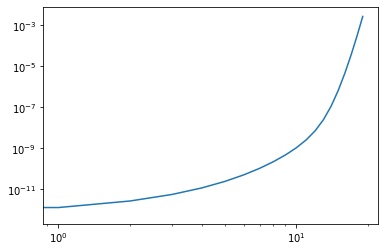

In [69]:
plt.loglog(np.array(list(map(mpf,df['tb']))),np.array(list(map(mpf,df['Whl2l3']))))